In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pygsp
from pygsp import graphs, filters
import networkx as nx
import pickle
import collections

In [3]:
#import graphs: 
Gnx = nx.read_gpickle('graph.gpickle')

In [5]:
#stupid examples 
A_1 = np.array([[0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0]])

In [6]:
A_4 = np.array([[0,1,0],[0,0,0],[0,1,0]])

In [7]:
A_5=np.array([[0,1],[0,0]])

In [8]:
G_1=nx.DiGraph(A_1)
G_2=nx.from_numpy_matrix(A_1)
G_3=nx.from_numpy_matrix(A_1)
G_4=nx.from_numpy_matrix(A_4)
G_5=nx.from_numpy_matrix(A_5)

In [9]:
Graphs=[G_1,G_2,G_3,G_4,G_5]

In [10]:
G_5=nx.DiGraph(A_5)

In [11]:
len(G_5.edges)

1

In [4]:
Graphs=[Gnx]

In [13]:
Gnx_undir=Gnx.to_undirected()

# Is Missing: Extract strongly connectected components, Number of triangles? 

# Basic properties of the graphs


We study basic properties of the graph such as number of nodes, number of edges, strongly connectedness, the diameter and the average clustering coefficient

In [6]:
i=1
for G in Graphs: 
    print ('The graph G_{} has {} nodes and {} edges '. format(i, len(G.nodes),len(G.edges)))
    i+=1

The graph G_1 has 500 nodes and 5675 edges 


In [7]:
# Check if the graph is strongly connected (if not, diameter=infinity)
i=1
for G in Graphs :
    if nx.is_strongly_connected(G):
        print('The graph G_{} is strongly connected and its diameter is {}'.format(i, nx.diameter(G)))
    else: 
        print('The graph G_{} is not strongly connected'.format(i))
    i=1+1

The graph G_1 is not strongly connected


In [8]:
#return a list of nodes for the stronlgy connected components of a directed graph, how does this work??
strongcc=nx.strongly_connected_components(Gnx)

In [9]:
strongcc

<generator object strongly_connected_components at 0x1a1dbf68e0>

In [10]:
#compute the diameter of undirected graphs:
i=1
for G in Graphs: 
    G_undir=G.to_undirected()
    print('The diameter of the undirected graph G_{} is {}'.format(i, nx.diameter(G_undir)))
    i+=1

The diameter of the undirected graph G_1 is 4


In [11]:
#compute average clustering coefficient: 
i=1
for G in Graphs:
    print('The graph G_{} has average clustering coefficient {}'.format(i,nx.average_clustering(G)))
    i=i+1

The graph G_1 has average clustering coefficient 0.25431729090180444


In [14]:
#compute the number of triangles
nx.triangles(Gnx_undir)

{'Stan Lee': 2083,
 'Dan Goodwin': 11,
 'What If (comics)': 279,
 "Comics Buyer's Guide": 347,
 'Robert Bernstein (comics)': 173,
 'Horror comics': 278,
 'Disney Legends': 1,
 'French New Wave': 9,
 'Marvel Cinematic Universe': 390,
 'Larry Lieber': 309,
 'Atlas Comics (1950s)': 485,
 'Google Books': 31,
 'Marvel Comics#Editors-in-chief': 485,
 'Don Heck': 504,
 'Joe Kubert': 261,
 'Carnegie Hall': 34,
 'Hank Pym': 232,
 'Secret Files and Origins': 133,
 'Marvel Legends': 270,
 'action figure': 28,
 'Archie Goodwin (comics)': 370,
 'Epic Illustrated': 120,
 'The A.V. Club': 39,
 'United States Army': 52,
 'George W. Bush': 144,
 'executive producer': 4,
 'Marie Wilson (American actress)': 6,
 'Bonnie Burton': 3,
 'Kyle Baker': 242,
 'Long Island': 160,
 'Marvel Universe': 592,
 'Silver Surfer': 289,
 'Kevin Maguire (artist)': 34,
 'Joe Simon': 233,
 'KTTV': 2,
 'Justice League': 454,
 'Amazing Heroes': 39,
 'The Galactus Trilogy': 86,
 'Peter David': 352,
 'Washington Heights, Manhatta

# Degree Distribution


question: as the graph is directed: do we compute the in-degree, out-degree or total degree?


In [19]:
#plot the degree histograms  
def plot_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Total Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [20]:
 #plot the in-degree histograms of a directed graph 
def plot_in_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("In-Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [21]:
#plot the out-degree histograms of a directed graph 
def plot_out_degree(G, name):
    degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Out-Degree Histogram for Graph "+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

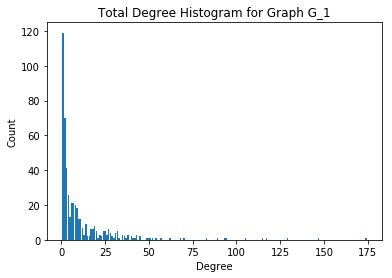

In [22]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_degree(G,name)
    i+=1

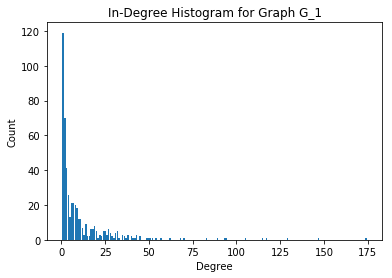

In [23]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_in_degree(G,name)
    i+=1

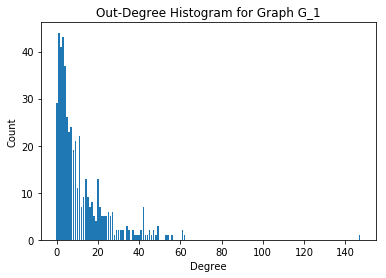

In [24]:
i=1
for G in Graphs: 
    name = 'G_'+ str(i)
    plot_out_degree(G,name)
    i+=1

do we need this below?

In [25]:
def plot_distribution(degree):
    '''
    degree list: the list of node degrees
    network_type: string used for plotting the title
    '''
    fig = plt.figure()
    ax = plt.gca()
    bins = min(int(np.max(degree) - np.min(degree)), 100)
    a = plt.hist(degree, bins=bins, density=True)
    #log = True
    plt.xlabel('Degree')
    plt.ylabel('Probability of node having degree k')
    plt.title('Degree distribution for ')

In [26]:
degree_1= np.sum(A_1, axis=0)

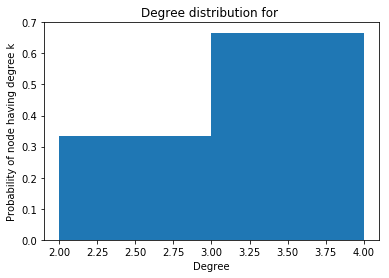

In [27]:
plot_distribution(degree_1)

In [28]:
G_1.degree

DiDegreeView({0: 6, 1: 8, 2: 6, 3: 4, 4: 8, 5: 4})